# Psychoinformatics - Week 12 (Exercises)
李采蓉 b08207042@ntu.edu.tw

In [10]:
%config IPCompleter.greedy=True 
%matplotlib inline

from numpy import *
from matplotlib.pyplot import *
from IPython.display import *
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
from sklearn import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import matplotlib.pyplot as plt

iris = datasets.load_iris()
X=iris.data; Y=iris.target

## 1 Performance Tuning of a Neural Net (8 points)

### 1.0 Baseline Performance
SVM can reach an classifcation accuracy ~ 8x% correct for the hard Iris problem.

In [211]:
sss=model_selection.StratifiedShuffleSplit(n_splits=5,test_size=0.1) # (45+45+45) vs. (5+5+5)
model=svm.SVC(C=10) #預設是"rbf"(高斯核)
acc=[]
a = 0
while a < 0.94:
    acc.clear()
    for train_index, test_index in sss.split(X, Y): # 5-fold cross-validation
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        model.fit(X_train[:,0:2],Y_train) #training
        acc.append(model.predict(X_test[:,0:2])==Y_test) # testing
    a = np.mean(acc)
print(a)

0.9466666666666667


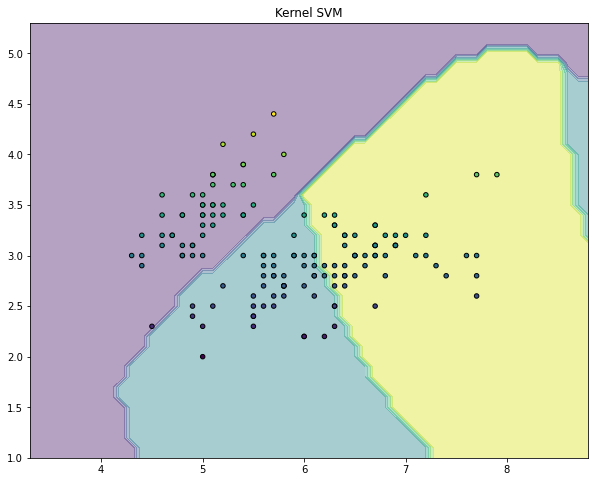

In [212]:
# https://www.jianshu.com/p/934b2e9e7d17

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolor='k')
axarr.set_title('Kernel SVM')

plt.show()

In [213]:
model=svm.SVC(C=10, kernel = "poly") # 多項式核
acc=[]
a = 0
while a < 0.94:
    acc.clear()
    for train_index, test_index in sss.split(X, Y): # 5-fold cross-validation
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        model.fit(X_train[:,0:2],Y_train) #training
        acc.append(model.predict(X_test[:,0:2])==Y_test) # testing
    a = np.mean(acc)
print(a)

0.9466666666666667


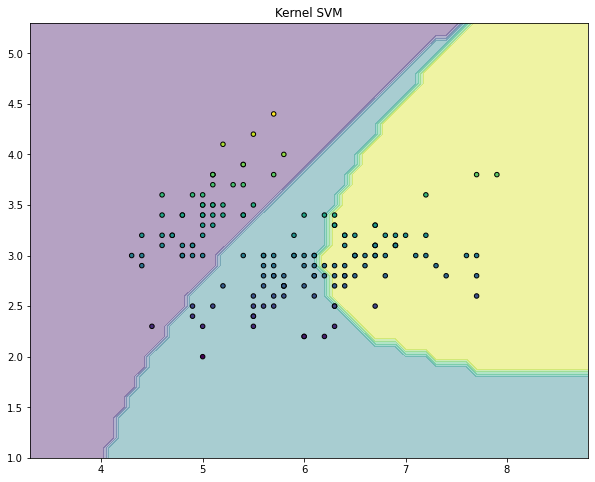

In [214]:
# https://www.jianshu.com/p/934b2e9e7d17

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolor='k')
axarr.set_title('Kernel SVM')

plt.show()

In [47]:
model=svm.SVC(C=10, kernel = "linear") # 線性核
acc=[]
a = 0
while a < 0.94:
    acc.clear()
    for train_index, test_index in sss.split(X, Y): # 5-fold cross-validation
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        model.fit(X_train[:,0:2],Y_train) #training
        acc.append(model.predict(X_test[:,0:2])==Y_test) # testing
    a = np.mean(acc)
print(a)

0.9466666666666667


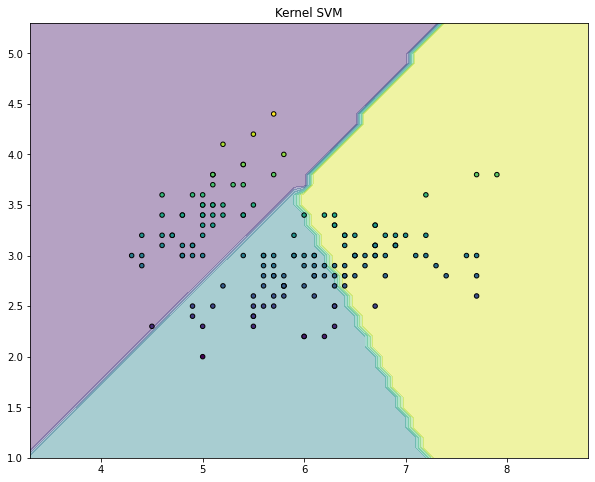

In [210]:
# https://www.jianshu.com/p/934b2e9e7d17

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolor='k')
axarr.set_title('Kernel SVM')

plt.show()

### 1.1 Tuning your ANN (4 points)
Tune your model hyperparameters (# of layers, # of units in each layer, activation function, optimizer, epochs, batch_size, etc.) to see if you can push your ANN performance up to ~9x% correct.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.utils import to_categorical

In [7]:
model = Sequential()

model.add(Dense(units=32, activation='LeakyReLU'))

model.add(Dense(units=128, activation='LeakyReLU'))

model.add(Dense(units=512, activation='LeakyReLU'))

model.add(Dense(units=3, activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
sss=model_selection.StratifiedShuffleSplit(n_splits=5,test_size=0.1) # (45+45+45) vs. (5+5+5)
acc=[]
a = 0
while a < 0.97:
    acc.clear()
    for train_index, test_index in sss.split(X, Y): # 5-fold cross-validation
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        model.fit(X_train[:,0:2], to_categorical(Y_train), epochs=10, batch_size=150, verbose = 0)
        acc.append(argmax(model.predict(X_test[:,0:2]),1)==Y_test) # testing
    a = np.mean(acc)
print(a)

0.9733333333333334


In [16]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                96        
                                                                 
 dense_5 (Dense)             (None, 128)               4224      
                                                                 
 dense_6 (Dense)             (None, 512)               66048     
                                                                 
 dense_7 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 71,907
Trainable params: 71,907
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
acc

[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True]),
 array([ True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True])]

In [19]:
train_index, test_index # 很重要

(array([120, 112,  56,  98,  36,  72,  94,   3, 145, 122,  12, 146,  51,
         28,  60, 144,  73, 128,  64,  71,  23,  11,  69, 101, 132,  47,
         76,  57,  15, 115, 141,  80,  92,  82,  54,  24, 149, 129, 105,
         91,  39, 131,  61,  68, 114,  97, 134, 116,   0,   4,   2,  70,
         53,   8,  77,  81, 117,  93,  27,  79,  17,  18,   5,   1, 103,
        119,  35,  85,   7,  32, 124,  14,  42,  67, 106, 137,  21, 148,
         43, 125, 142, 133, 139, 127,  33,  22,  31,  46,  74, 136,  41,
          6,  20, 135,  52,  90,  84, 130,  38,  62,  16,  63,  25, 140,
         13,  83,  99, 102,  55,  50,  66, 100,  86,  34, 109,  19, 143,
         96,  44,  26,  95,  59, 107,  30, 111,  48, 121, 118, 138, 126,
         78, 108,  49,  88,  29], dtype=int64),
 array([147,  89, 113,  58, 123,  87,  40,  45,   9, 104,  37, 110,  65,
         10,  75], dtype=int64))

### 1.2 Is your (deep) network better than SVM? Why or why not? (4 points)

Please write your answer here.

差不多，這次作業來講從資料集等分割抓到哪些樣本對於模型訓練的重要性不亞於結構上的調整(算是有點需要幸運值或多刷幾次看會不會掉寶的作業)，其實還可以去比較這些能達到預測值準確率高的等分分割資料結果是不是接近的，但我在打這段話時才想到(笑)。

神經網路一直以能夠靠著調整參數去逼近非線性函式而被廣泛利用，而SVM也可以靠著核函式(kernel)的選擇將非線性問題映射到多維特徵空間中建構成線性的判別式。這次的資料集共有150筆樣本和四種特徵，是算偏小且特徵少的資料集，加上本身樣本沒有什麼分類問題，彼此間的關係都還算清楚(從SVM的那三張圖就可以看出不論哪種核函式都可以有很好的分類表現)，其實不論是NN或者SVM都可以達到一定的良好準確率，假若要再更精進的話，大概就是要增加樣本數和特徵數了。

回到這次的NN模型，做比較大的調整就是像傳統上講的"加深加廣"，將結構加深到三層外，結點數也增加，最後總共有七萬多個parameter，因為沒有做過那麼小樣本數的模型訓練，比較怕的就是overfitting的問題；而將激活函數改為LeakyReLU則是為了避免神經元的死亡，讓小於0的部分依舊有數值能夠計算梯度；而對於小資料集來說，batch_size就直接all-in了。

要真的說這個NN模型有哪裡優於SVM的話...大概是複雜度的部分吧(雖然感覺不出來，樣本太少了)，還有就是沒有那麼看抓到的樣本是誰(SVM都要跑超多迴圈才能找到比較好的等分割樣本)，猜想是跟NN抓到甚麼就是做甚麼樣的非線性模型有關(比較靈活?)